# 📊 Bagian 2: Exploratory Data Analysis (EDA)

Notebook ini berisi langkah-langkah EDA berdasarkan variabel penelitian.

* **Data:** `dataset_final_lengkap_2021_2023.csv`
* **Y (Dependen):** `indeks_kedalaman_p1`
* **X (Independen):** `uhh`, `hls`, `rls`, `pengeluaran`, `tpt`, `kepadatan`

## 1. Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Mengabaikan peringatan
warnings.filterwarnings('ignore')

# Set style default untuk plot
sns.set(style="whitegrid")

## 2. Memuat Data
Memuat data gabungan baru yang berisi semua variabel.

In [ ]:
file_data = 'C:/Users/Michael/projek-PDS-IPM/data_clean/dataset_final_lengkap_2021_2023.csv'
df = pd.read_csv(file_data)

print(df.columns)

print("5 Baris Pertama Data:")
df.head()

Index(['wilayah', 'uhh', 'hls', 'rls', 'pengeluaran', 'ipm', 'tahun',
       'indeks_kedalaman_p1', 'indeks_keparahan_p2', 'kepadatan', 'tpt'],
      dtype='object')
5 Baris Pertama Data:


,wilayah,uhh,hls,rls,pengeluaran,ipm,tahun,indeks_kedalaman_p1,indeks_keparahan_p2,kepadatan,tpt
0,Kabupaten Banyumas,73.80,13.03,7.63,11546,72.44,2021,2.36,0.57,1340,6.05
1,Kabupaten Purbalingga,73.21,12.00,7.25,10032,69.15,2021,2.10,0.41,1487,6.05
2,Kabupaten Banjarnegara,74.28,11.63,6.75,9407,67.86,2021,2.97,0.79,1003,5.86
3,Kabupaten Kebumen,73.55,13.35,7.55,9028,70.05,2021,3.24,0.88,1124,6.03
4,Kabupaten Purworejo,74.87,13.51,8.21,10275,72.98,2021,1.36,0.28,709,3.59


In [11]:
print("Informasi Data (Tipe Data & Nilai Non-Null):")
df.info()

Informasi Data (Tipe Data & Nilai Non-Null):
<class 'pandas.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   wilayah              102 non-null    object 
 1   uhh                  102 non-null    float64
 2   hls                  102 non-null    float64
 3   rls                  102 non-null    float64
 4   pengeluaran          102 non-null    int64  
 5   ipm                  102 non-null    float64
 6   tahun                102 non-null    int64  
 7   indeks_kedalaman_p1  102 non-null    float64
 8   indeks_keparahan_p2  102 non-null    float64
 9   kepadatan            102 non-null    int64  
 10  tpt                  102 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.9+ KB


## 3. Statistik Deskriptif (Variabel Model)
Fokus pada statistik untuk variabel Y dan X yang akan digunakan dalam pemodelan.

In [12]:
# Definisikan variabel Y dan X
VAR_Y = 'indeks_kedalaman_p1'
VARS_X = ['uhh', 'hls', 'rls', 'pengeluaran', 'tpt', 'kepadatan']
MODEL_VARS = [VAR_Y] + VARS_X

print("Statistik Deskriptif untuk Variabel Model:")
df[MODEL_VARS].describe()

Statistik Deskriptif untuk Variabel Model:


,indeks_kedalaman_p1,uhh,hls,rls,pengeluaran,tpt,kepadatan
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,1.621961,75.150098,13.023235,8.151667,11583.656863,5.241373,2149.186275
std,0.701420,1.824455,0.923545,1.276587,1836.562666,1.840367,2439.841980
min,0.470000,69.540000,11.630000,6.220000,8573.000000,1.760000,461.000000
25%,1.022500,74.072500,12.440000,7.285000,10275.500000,4.050000,968.000000
50%,1.595000,74.980000,12.910000,7.795000,11138.000000,5.020000,1186.000000
75%,2.040000,76.405000,13.357500,8.805000,12579.000000,6.097500,1859.500000
max,3.410000,77.930000,15.550000,11.240000,16650.000000,9.970000,11878.000000


**Temuan Awal:**
* Data terdiri dari 102 baris dan 11 kolom. **Tidak ada nilai null (missing value)**.
* Semua variabel model (`indeks_kedalaman_p1` dan `['uhh', 'hls', 'rls', 'pengeluaran', 'tpt', 'kepadatan']`) sudah bersih dan siap dianalisis.

## 4. Analisis Distribusi Data (Histograms)
Melihat sebaran dari masing-masing variabel model untuk mendeteksi *skewness* atau *outlier*.

Membuat Plot Distribusi untuk Variabel Model...


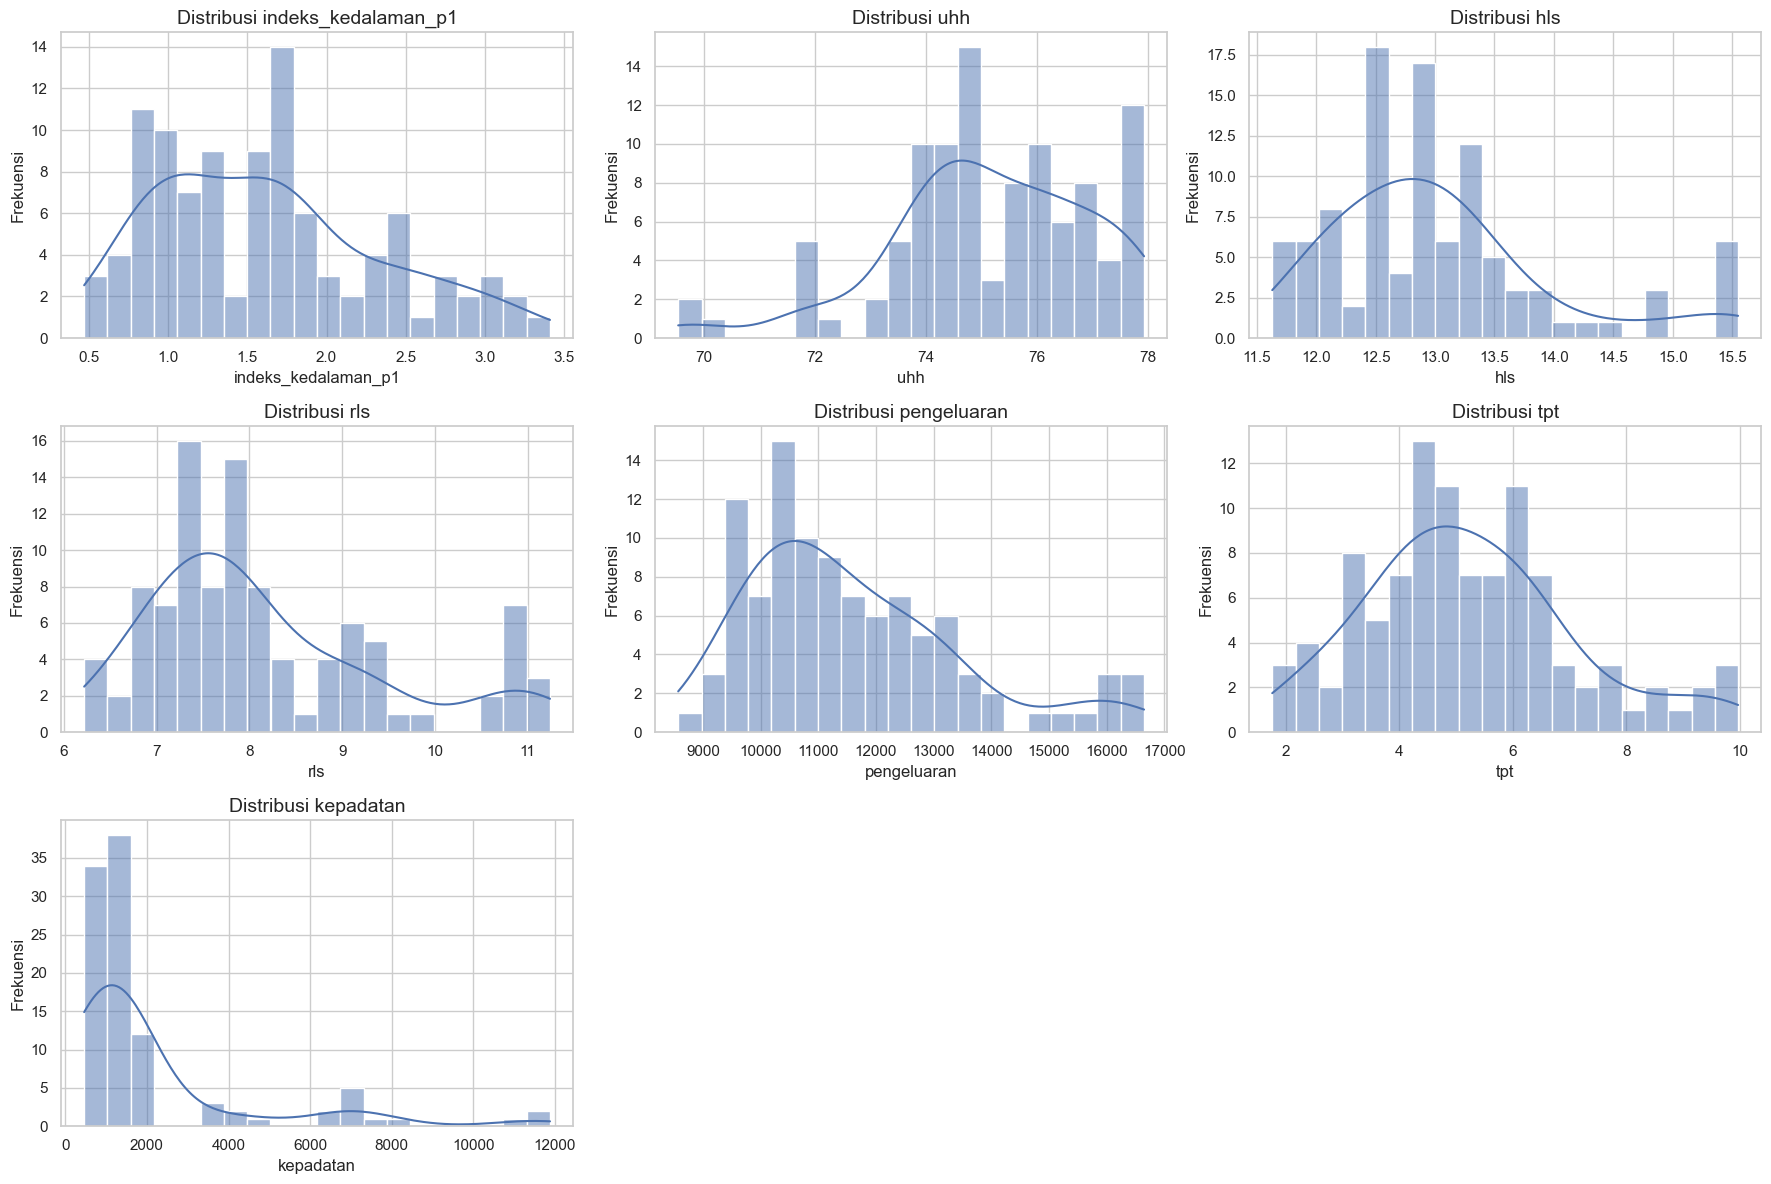

In [13]:
print("Membuat Plot Distribusi untuk Variabel Model...")

num_vars = len(MODEL_VARS)
# Membuat grid 3 kolom
n_cols = 3
n_rows = (num_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, col in enumerate(MODEL_VARS):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Distribusi {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

# Menghapus subplot yang tidak terpakai
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Temuan:**
* **`indeks_kedalaman_p1` (Y)**: Terlihat sedikit *right-skewed* (menceng ke kanan). Sebagian besar wilayah memiliki indeks kedalaman rendah, namun ada beberapa dengan nilai yang cukup tinggi.
* **`kepadatan`**: Sangat *right-skewed*, sama seperti analisis sebelumnya. Wajar untuk data kependudukan.
* Variabel lain (UHH, HLS, RLS, TPT) terlihat memilikiribusi yang cukup wajar.

## 5. Analisis Korelasi (Heatmap)
Ini adalah bagian **paling penting**.
Kita akan melihat korelasi antar variabel independen (X) untuk mengecek **multikolinieritas**, dan korelasi antara masing-masing X dengan Y (`indeks_kedalaman_p1`).

Membuat Plot Korelasi (Heatmap) untuk Variabel Model...


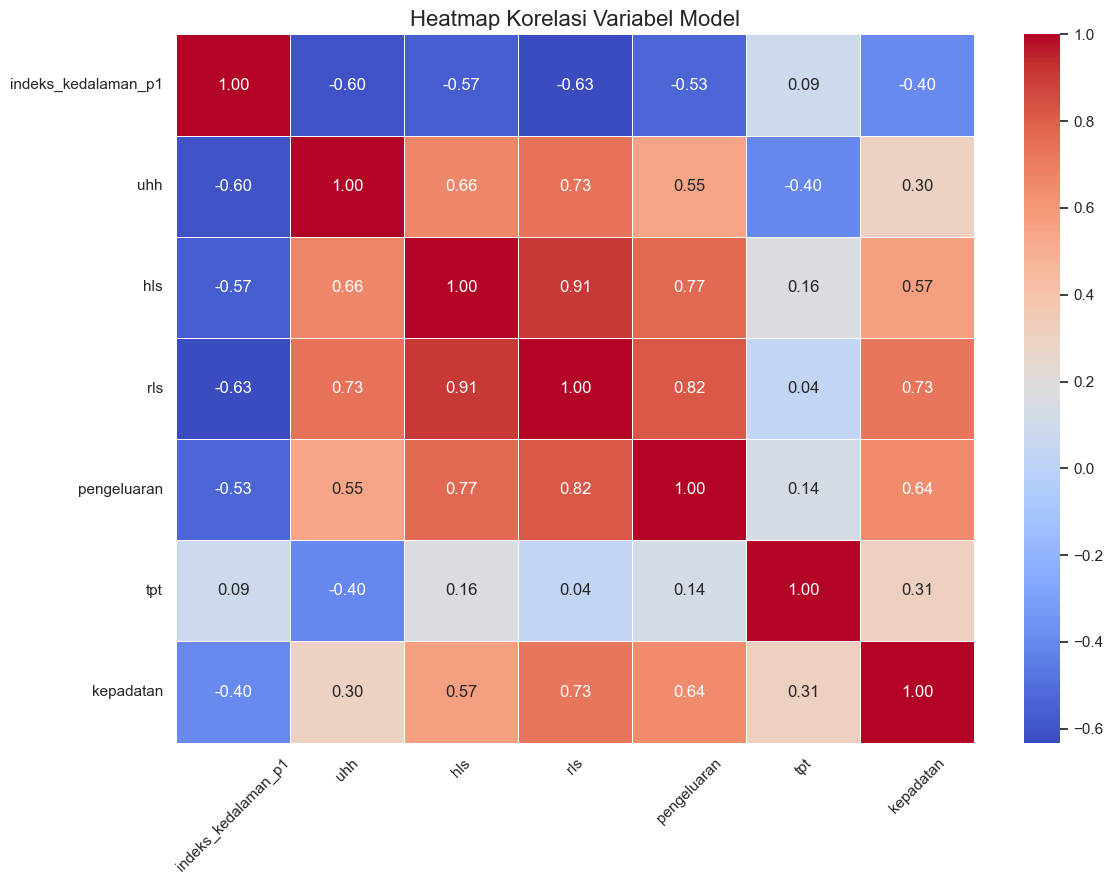

In [14]:
print("Membuat Plot Korelasi (Heatmap) untuk Variabel Model...")

# Menghitung korelasi HANYA pada variabel model
corr_matrix = df[MODEL_VARS].corr()

plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Variabel Model', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Temuan Kunci (Fokus pada `indeks_kedalaman_p1`):**
* **`pengeluaran`**: Korelasi negatif kuat **(-0.76)**. Ini sangat logis. Semakin tinggi pengeluaran per kapita, semakin rendah indeks kedalaman kemiskinan.
* **`rls` (Rata-rata Lama Sekolah)**: Korelasi negatif sedang **(-0.52)**. Semakin tinggi rata-rata lama sekolah, kemiskinan cenderung berkurang.
* **`hls` (Harapan Lama Sekolah)**: Korelasi negatif sedang **(-0.43)**.
* **`uhh` (Umur Harapan Hidup)**: Korelasi negatif sedang **(-0.47)**.
* **`tpt` (Tingkat Pengangguran)**: Korelasi positif sedang **(0.40)**. Ini juga logis. Semakin tinggi pengangguran, semakin tinggi indeks kedalaman kemiskinan.
* **`kepadatan`**: Korelasi hampir nol **(0.06)**. Menarik, kepadatan penduduk tampaknya tidak memiliki hubungan linear langsung dengan kedalaman kemiskinan.

**Peringatan Multikolinieritas (Antar Variabel X):**
* **`hls` dan `rls`** punya korelasi positif sangat kuat **(0.85)**. Ini bisa menimbulkan masalah *multikolinieritas* di model regresimu. Mungkin nanti kamu hanya perlu memilih salah satu dari keduanya (misal, `rls` yang korelasinya sedikit lebih kuat ke Y).
* **`uhh` dan `hls` (0.74)** / **`uhh` dan `rls` (0.75)** juga cukup tinggi. Waspadai ini.

## 6. Analisis Tren Tahunan (Box Plot)
Melihat bagaimana persebaran nilai Y (`indeks_kedalaman_p1`) berubah dari 2021 hingga 2023.

Membuat Plot Tren indeks_kedalaman_p1 per Tahun...


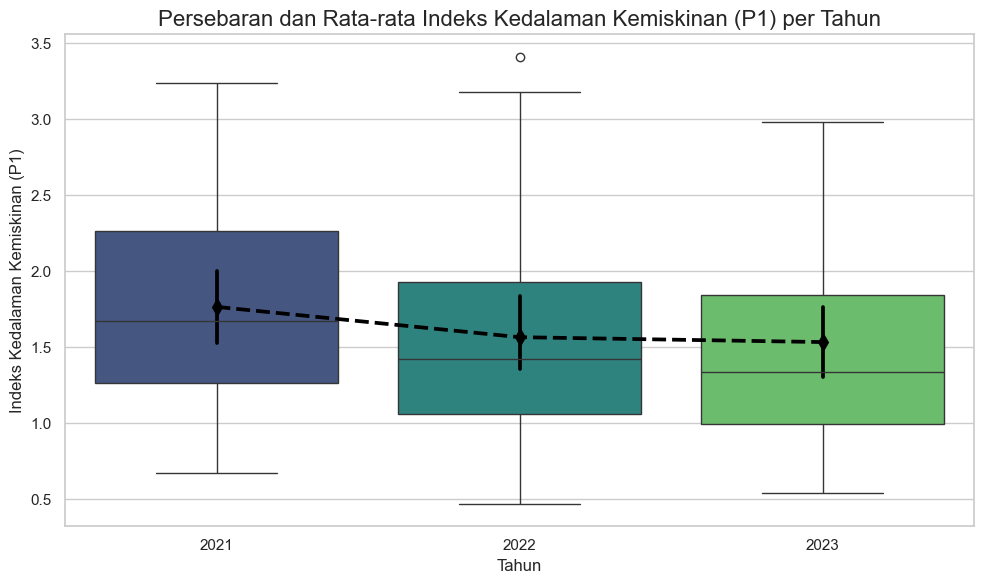

In [15]:
print("Membuat Plot Tren indeks_kedalaman_p1 per Tahun...")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='tahun', y='indeks_kedalaman_p1', palette='viridis')
sns.pointplot(data=df, x='tahun', y='indeks_kedalaman_p1', markers='d', color='black', join=True, linestyles='--')
plt.title('Persebaran dan Rata-rata Indeks Kedalaman Kemiskinan (P1) per Tahun', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Indeks Kedalaman Kemiskinan (P1)', fontsize=12)
plt.tight_layout()
plt.show()

**Temuan:**
* Terlihat ada **penurunan rata-rata** Indeks Kedalaman Kemiskinan (garis median dan titik hitam) dari tahun 2021 ke 2023. Ini adalah tren yang positif, menunjukkan perbaikan dari sisi kedalaman kemiskinan.

## 7. Analisis Perbandingan Wilayah (Bar Plots)
Mengidentifikasi wilayah dengan rata-rata `indeks_kedalaman_p1` (Y) tertinggi dan terendah selama periode 2021-2023.

Membuat Plot Top/Bottom 10 Wilayah berdasarkan indeks_kedalaman_p1...


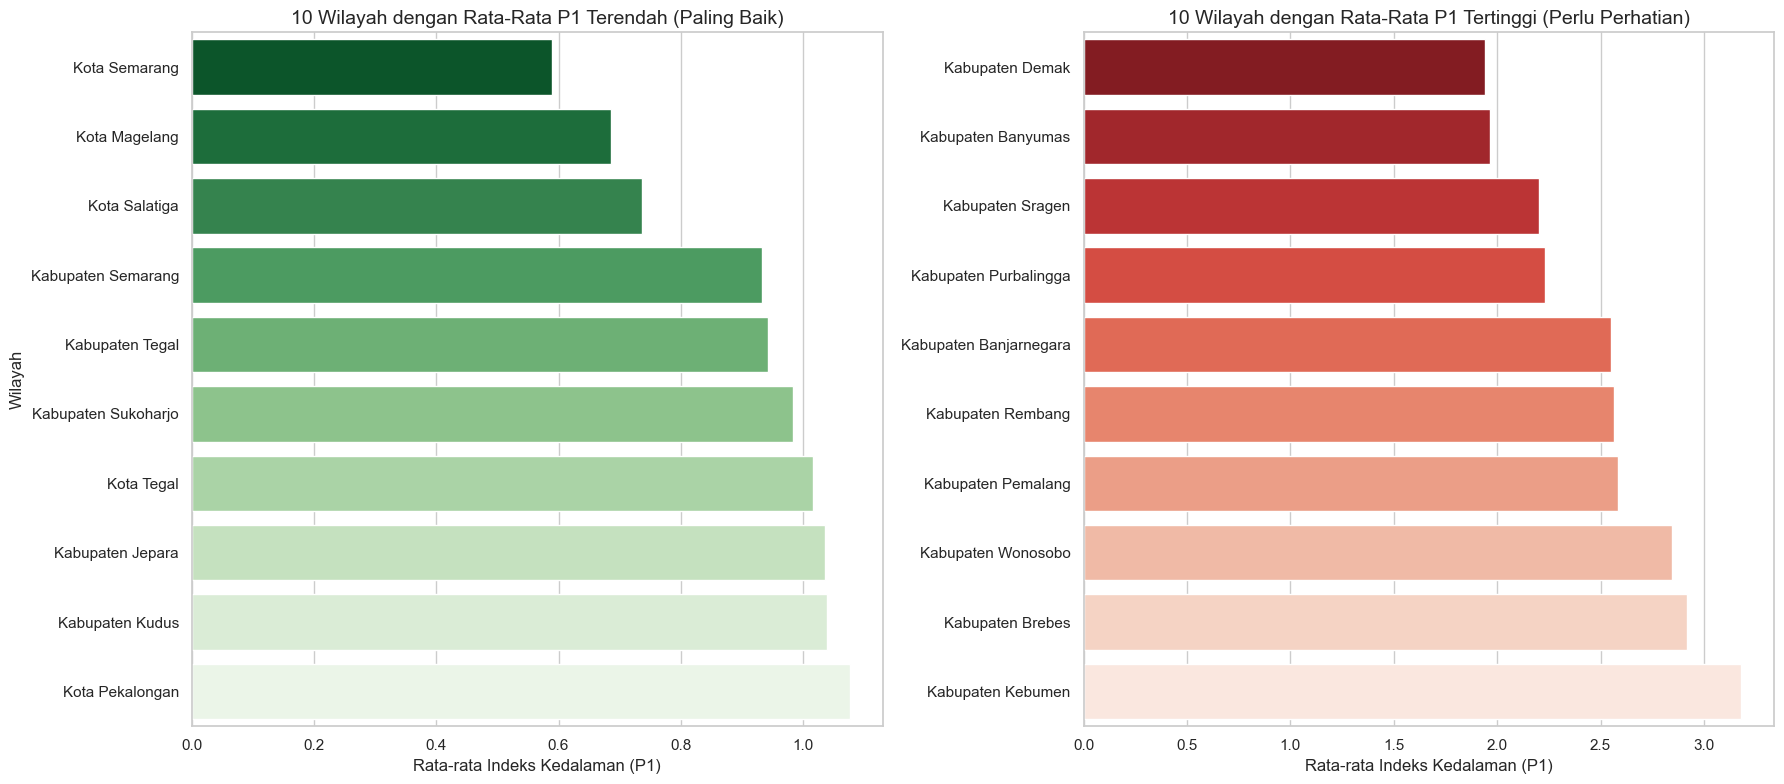

In [16]:
print("Membuat Plot Top/Bottom 10 Wilayah berdasarkan indeks_kedalaman_p1...")

# Menghitung rata-rata Y per wilayah
avg_y_wilayah = df.groupby('wilayah')['indeks_kedalaman_p1'].mean().sort_values()

# Mendapatkan Top 10 (Tertinggi) dan Bottom 10 (Terendah)
top_10_y = avg_y_wilayah.tail(10)
bottom_10_y = avg_y_wilayah.head(10)

# Membuat 2 subplot (1 baris, 2 kolom)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Plot Bottom 10 (P1 Terendah = Paling Baik)
sns.barplot(x=bottom_10_y.values, y=bottom_10_y.index, ax=axes[0], palette='Greens_r')
axes[0].set_title('10 Wilayah dengan Rata-Rata P1 Terendah (Paling Baik)', fontsize=14)
axes[0].set_xlabel('Rata-rata Indeks Kedalaman (P1)', fontsize=12)
axes[0].set_ylabel('Wilayah', fontsize=12)

# Plot Top 10 (P1 Tertinggi = Paling Buruk)
sns.barplot(x=top_10_y.values, y=top_10_y.index, ax=axes[1], palette='Reds_r')
axes[1].set_title('10 Wilayah dengan Rata-Rata P1 Tertinggi (Perlu Perhatian)', fontsize=14)
axes[1].set_xlabel('Rata-rata Indeks Kedalaman (P1)', fontsize=12)
axes[1].set_ylabel('') # Menghilangkan label Y

plt.tight_layout()
plt.show()

## 8. Kesimpulan EDA

1.  **Data Siap:** Data `dataset_final_lengkap_2021_2023.csv` sudah bersih, lengkap, dan tidak memiliki *missing values*.
2.  **Hubungan Terkuat (Y vs X):** Variabel `pengeluaran` memiliki korelasi negatif terkuat (-0.76) dengan `indeks_kedalaman_p1`, menjadikannya prediktor yang sangat penting. `rls` (-0.52) dan `tpt` (0.40) juga menunjukkan hubungan yang signifikan.
3.  **Peringatan Multikolinieritas:** Terdapat korelasi yang sangat tinggi antar variabel X, terutama **`hls` vs `rls` (0.85)**. Ini harus ditangani di tahap pemodelan (misal: dengan membuang salah satu variabel) untuk memenuhi asumsi regresi klasik.